## 1. Loading Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the dataset

In [5]:
clean_job_sat = pd.read_csv("clean_job_sat.csv")

### 2.1. Key Variables Description

The analysis focuses on the following key variables:

- **stfmjob**: Job satisfaction — response to the question: *“How satisfied are you in your main job?”* measured on a scale from 0 (*Extremely unsatisfied*) to 10 (*Extremely satisfied*).
- **happy**: General happiness — response to the question: *“Taking all things together, how happy would you say you are?”* measured on a scale from 0 (*Extremely unhappy*) to 10 (*Extremely happy*).

---

### 2.2. Socioeconomic Variables

| Variable  | Description | Type |
|:--------- |:------------|:---- |
| **inprdsc** | Number of people with whom the respondent can discuss intimate and personal matters | Ordinal |
| **health** | Subjective general health | Ordinal |
| **hlthhmp** | Hampered in daily activities by illness/disability/infirmity/mental problem | Binary |
| **rlgdgr** | Level of religiosity | Ordinal |
| **brncntr** | Born in country | Binary |
| **gndr** | Gender | Binary |
| **agea** | Age of respondent (calculated) | Quantitative |
| **rshpsts** | Relationship status with husband/wife/partner currently living with | Qualitative |
| **domicil** | Domicile (urban/rural) | Qualitative |
| **edulvlb** | Highest level of education | Ordinal |
| **eduyrs** | Years of full-time education completed | Quantitative |

---

### 2.3. Job-Related Variables

| Variable  | Description | Type |
|:--------- |:------------|:---- |
| **uempla** | Unemployed, actively looking for a job (last 7 days) | Binary |
| **uempli** | Unemployed, not actively looking for a job (last 7 days) | Binary |
| **rtrd** | Retired (last 7 days) | Binary |
| **hswrk** | Housework, looking after children (last 7 days) | Binary |
| **emplrel** | Employment relation: employee, self-employed, family business worker | Qualitative |
| **wrkctra** | Type of employment contract (unlimited or limited duration) | Binary |
| **estsz** | Establishment size (workplace size) | Quantitative |
| **nacer2** | Job industry classification | Qualitative |
| **tporgwk** | Type of organization the respondent works/worked for | Qualitative |
| **uemp3m** | Ever unemployed and seeking work for more than three months | Binary |
| **atncrse** | Participation in courses/lectures/conferences (last 12 months) | Binary |
| **hincsrca** | Main source of household income | Qualitative |
| **hinctnta** | Total household net income from all sources | Quantitative |

---

### 2.4. Work-Life Balance Variables

| Variable  | Description | Type |
|:--------- |:------------|:---- |
| **wkdcorga** | Allowed to decide how daily work is organized | Ordinal |
| **wkhtot** | Total hours normally worked per week (including overtime) | Quantitative |
| **emprelp** | Partner's employment relation | Qualitative |
| **trdawrk** | Frequency of being too tired after work to enjoy home activities | Ordinal |
| **jbprtfp** | Job prevents giving time to partner/family (frequency) | Ordinal |
| **pfmfdjba** | Partner/family fed up with job pressure (frequency) | Ordinal |
| **dcsfwrka** | Can decide start/finish time at work | Ordinal |


## 3. Histograms of Numeric Variables

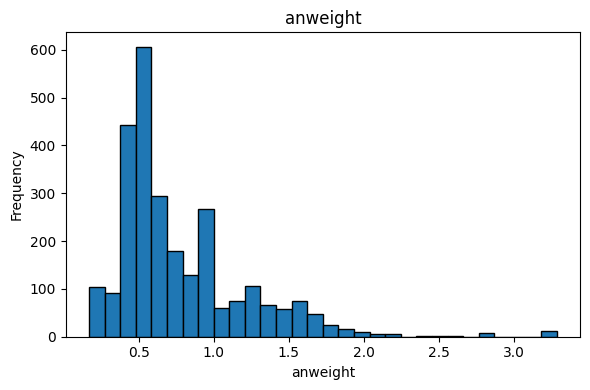

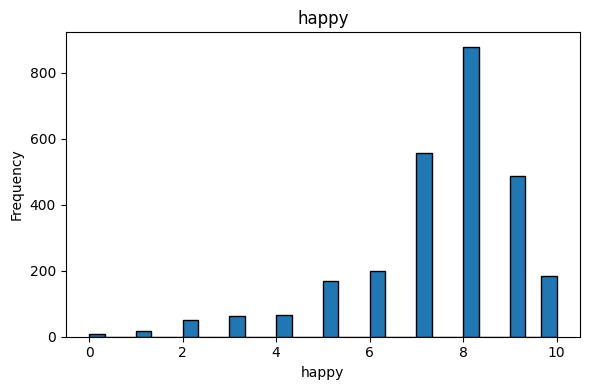

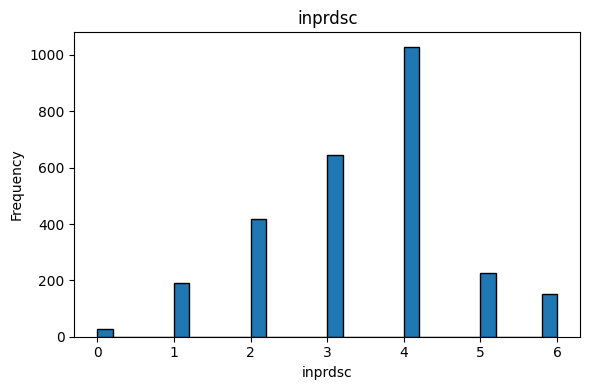

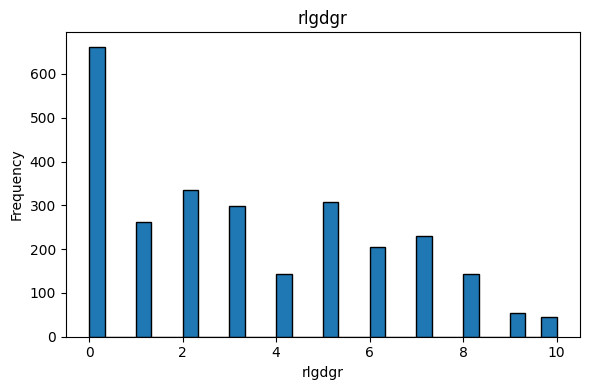

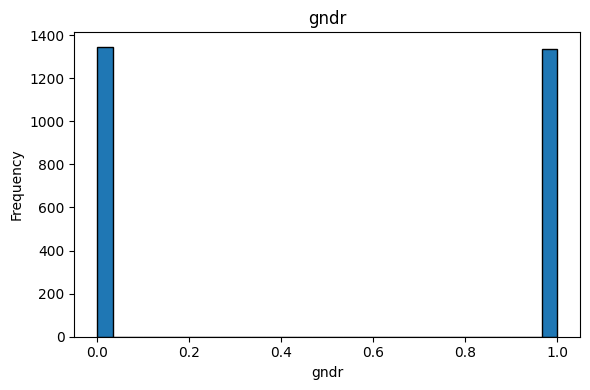

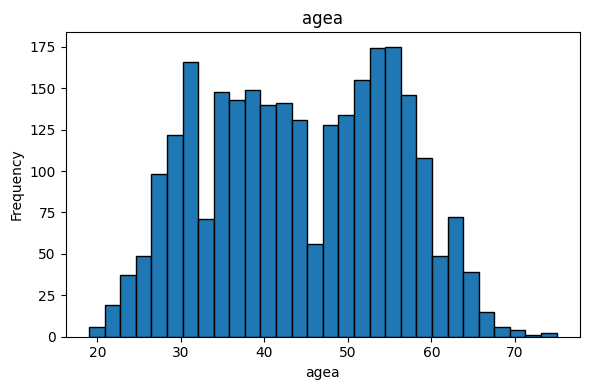

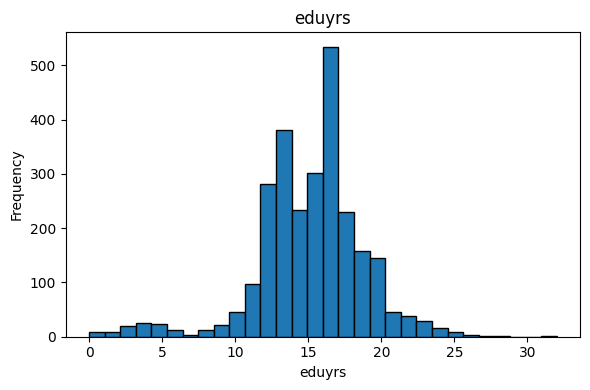

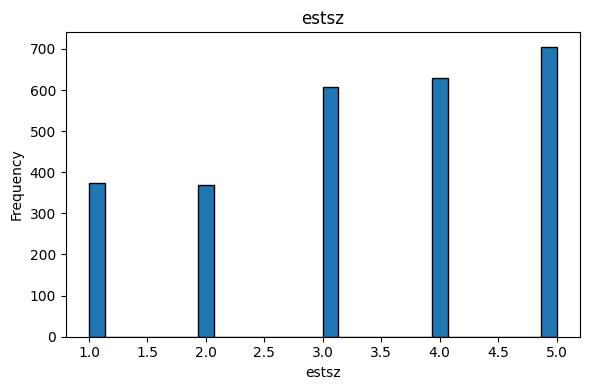

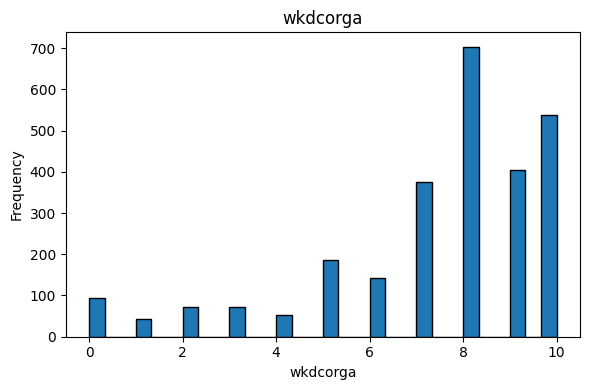

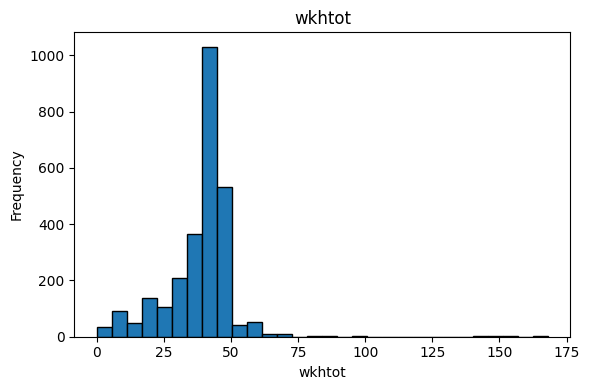

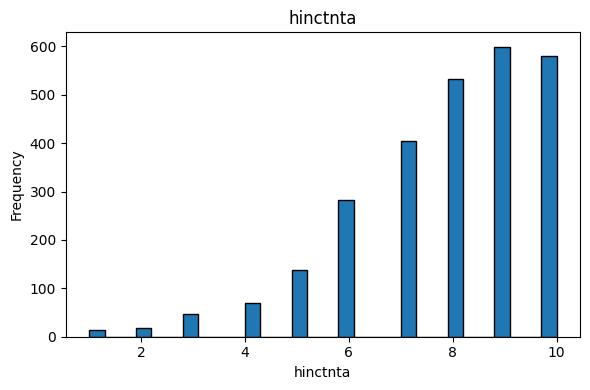

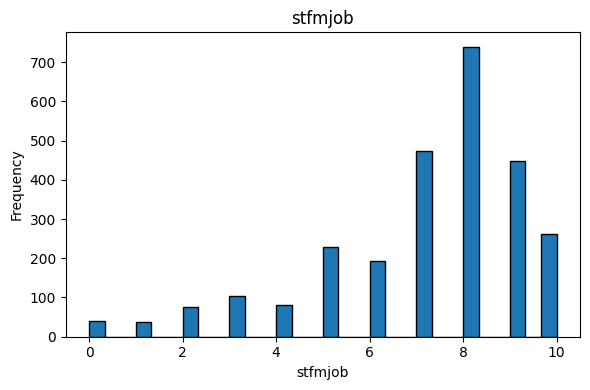

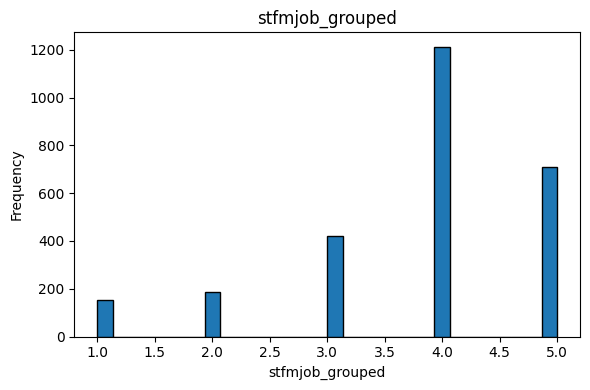

In [9]:
# Plot histograms only for numeric columns
for col in clean_job_sat.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    plt.hist(clean_job_sat[col].dropna(), bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### 3.1. Summary of distributions 

In this section, histograms are plotted for all numeric variables to explore their distributions. These visualizations provide insights into the central tendency, spread, and skewness of the data.

- **Age (agea)**: The age distribution is right-skewed, with the majority of respondents falling into younger and middle-aged categories. This suggests that the sample is composed largely of working-age individuals, with fewer respondents in older age brackets.

- **Years of Education (eduyrs)**: The distribution of education years is moderately right-skewed. Most respondents report moderate years of education, with a declining number reaching higher education levels. This may reflect typical education attainment patterns in the population.

- **Household Net Income (hinctnta)**: Household income is heavily right-skewed, with a concentration of respondents reporting lower to moderate incomes. A long tail toward higher incomes indicates the presence of a smaller number of high-earning households, a common pattern in income distributions.

- **Total Weekly Work Hours (wkhtot)**: The majority of respondents report working between 35 to 40 hours per week, aligning with standard full-time employment. However, there are observations with very low or very high work hours, suggesting variability such as part-time work or extended overtime.

- **Job Satisfaction (stfmjob)**: Job satisfaction scores are concentrated at the higher end (scores of 7–9), indicating that a large proportion of the sample reports being relatively satisfied with their jobs. Very low satisfaction scores are rare.

- **General Happiness (happy)**: Similar to job satisfaction, happiness scores are skewed toward the higher end of the scale, suggesting that most respondents report high levels of general happiness. This skewness indicates a generally positive self-assessment of life satisfaction.

---

Overall, these histograms reveal a dataset where respondents typically report high job satisfaction and happiness, moderate education levels, standard working hours, and exhibit typical patterns of income distribution. These initial insights provide a foundation for more detailed statistical analysis and modeling.

## 4. Distribution of Countries

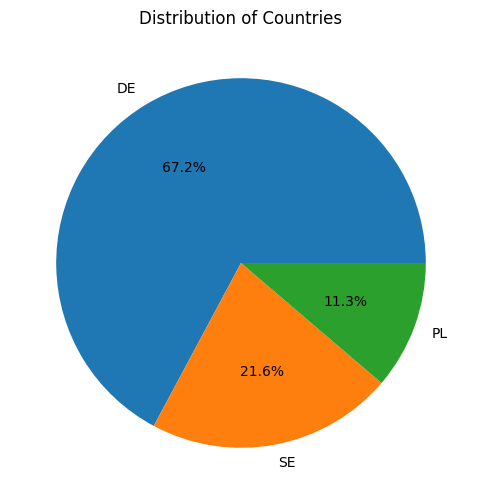

In [7]:
plt.figure(figsize=(6, 6))
clean_job_sat['cntry'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Countries")
plt.ylabel("")
plt.show()


- A pie chart is generated to visualize the proportion of respondents from different countries.
- It shows that the **majority** of the data comes from **Germany** (DE), with **smaller** proportions from **Sweden** (SE) and **Poland** (PL).
- This helps in understanding the sample distribution and potential biases.

## 5. Proportion of Organization Types by Country

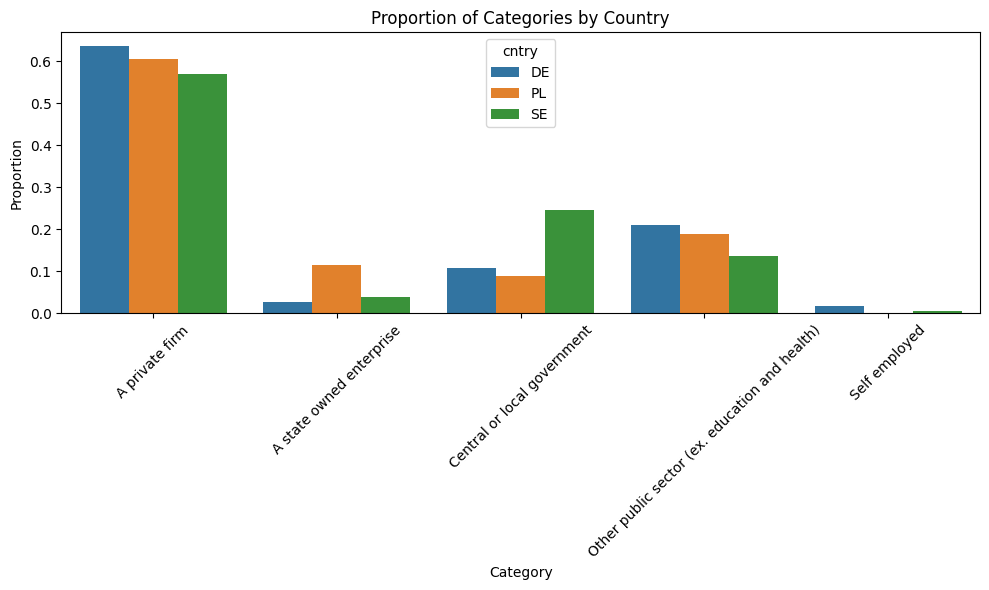

In [8]:
country_props = (
    clean_job_sat.groupby(['cntry', 'tporgwk'])
    .size()
    .reset_index(name='count')
)

country_props['proportion'] = (
    country_props.groupby('cntry')['count'].transform(lambda x: x / x.sum())
)

plt.figure(figsize=(10, 6))
sns.barplot(data=country_props, x='tporgwk', y='proportion', hue='cntry')
plt.title("Proportion of Categories by Country")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- This bar chart displays the proportion of different organization types (e.g., private firm, public sector) by country.
- It provides insight into employment structures across countries, highlighting that private firms are the dominant type across all countries.
- The differences in the **structure of employment** could explain variations in **job satisfaction** or **happiness** between countries.

## 6. Happiness Distribution

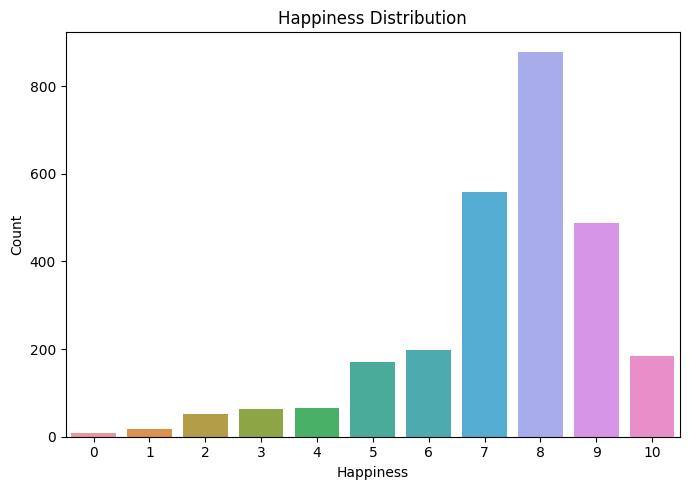

In [12]:
# Happiness Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=clean_job_sat, x='happy')
plt.title("Happiness Distribution")
plt.xlabel("Happiness")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

-A count plot showing the overall distribution of happiness levels.
-The distribution is skewed toward **higher values (7-10)**, suggesting that most respondents report relatively **high happiness**.

## 7. Happiness Proportions by Country

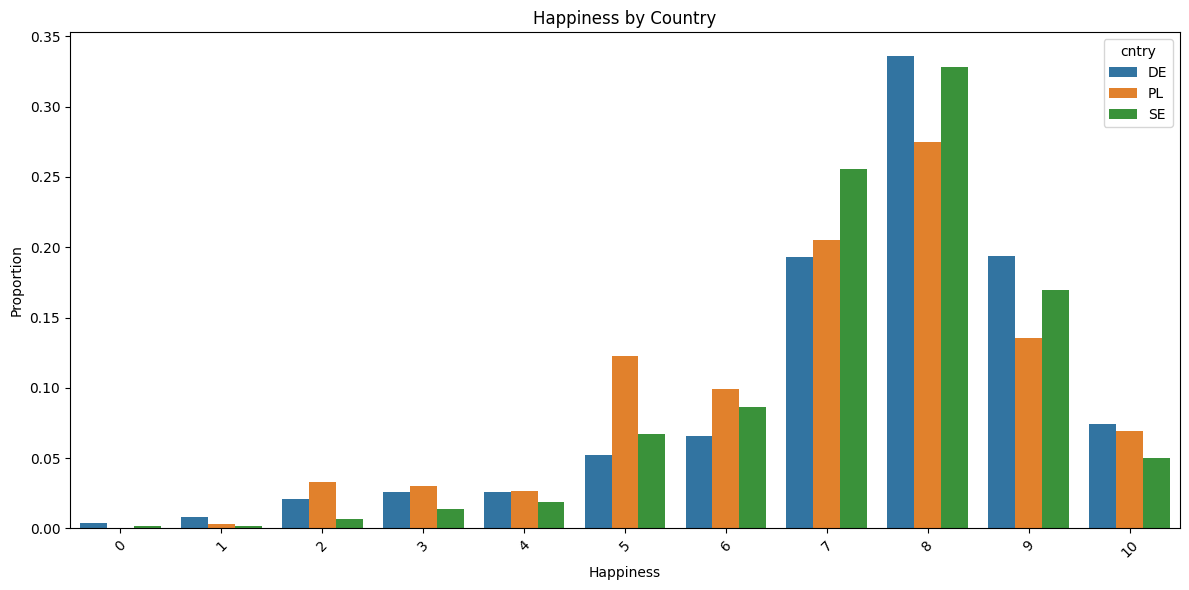

In [ ]:
#Happiness Proportions by Country
happy_props = (
    clean_job_sat.groupby(['cntry', 'happy'])
    .size()
    .reset_index(name='count')
)
happy_props['proportion'] = (
    happy_props.groupby('cntry')['count'].transform(lambda x: x / x.sum())
)

plt.figure(figsize=(12, 6))
sns.barplot(data=happy_props, x='happy', y='proportion', hue='cntry')
plt.title("Happiness by Country")
plt.xlabel("Happiness")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- A bar plot presenting the proportion of happiness scores by country.
- It reveals subtle differences in happiness distribution between countries, where for example, respondents from **Sweden** (SE) appear slightly more concentrated at **higher happiness** levels compared **to Poland** (PL) and **Germany** (DE).
- This visualization can guide further comparative analysis of subjective well-being across nations.

## 8. Happiness by Country

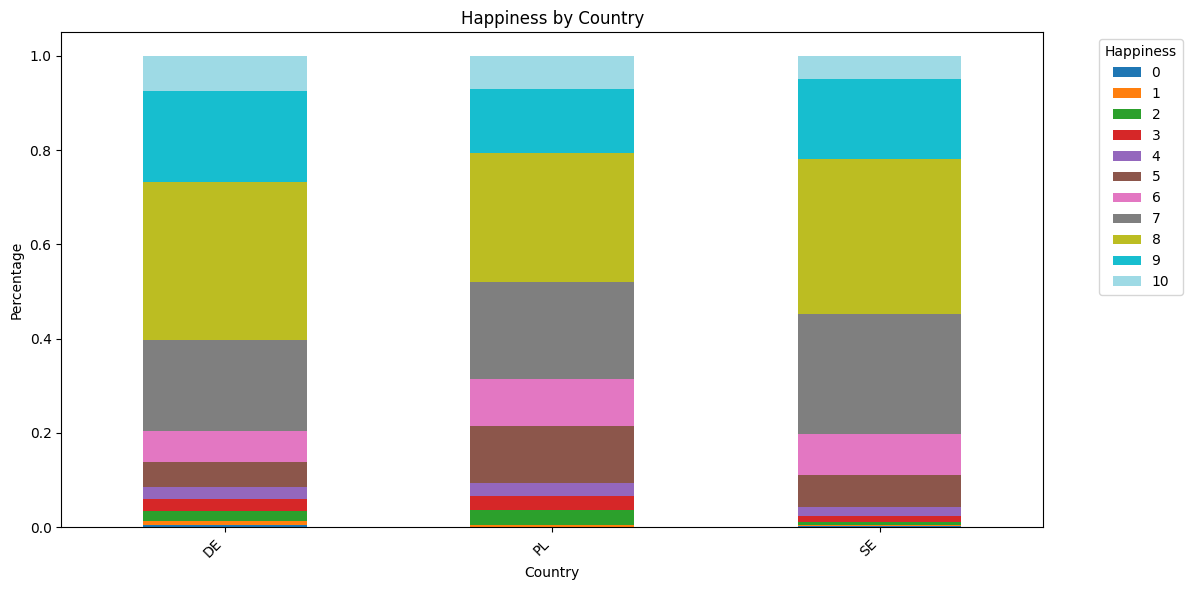

In [15]:
#Happiness by Country
cross_tab = pd.crosstab(clean_job_sat['cntry'], clean_job_sat['happy'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Happiness by Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.legend(title="Happiness", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- A stacked bar chart displays the distribution of self-reported happiness scores across three countries (DE, PL, SE).
- The majority of respondents report higher happiness scores (7-9), indicating overall positive well-being.
- **Sweden** (SE) and **Germany** (DE) have a **larger** proportion of highly **happy individuals** compared **to Poland** (PL).

## 9. Job Satisfaction by Job Category

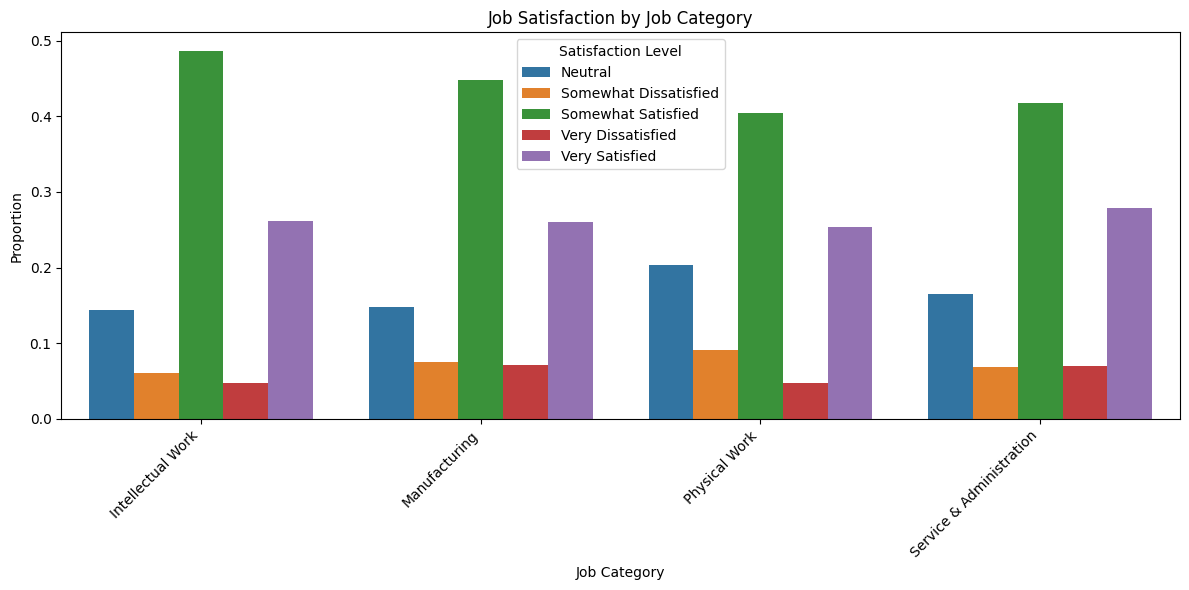

In [16]:
# --- Proportions by Job Category and Satisfaction Level ---
job_props = (
    clean_job_sat.groupby(['nacer2', 'stfmjob_named'])
    .size()
    .reset_index(name='count')
)
job_props['proportion'] = (
    job_props.groupby('nacer2')['count'].transform(lambda x: x / x.sum())
)

plt.figure(figsize=(12, 6))
sns.barplot(data=job_props, x='nacer2', y='proportion', hue='stfmjob_named')
plt.title("Job Satisfaction by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Satisfaction Level")
plt.tight_layout()
plt.show()

- A grouped bar chart shows the distribution of job satisfaction levels across different job categories:
- **Intellectual Work, Manufacturing, Physical Work, and Service & Administration**.
- Across all categories, the **majority of respondents are "Somewhat Satisfied."**

## 10. Job Satisfaction by Country

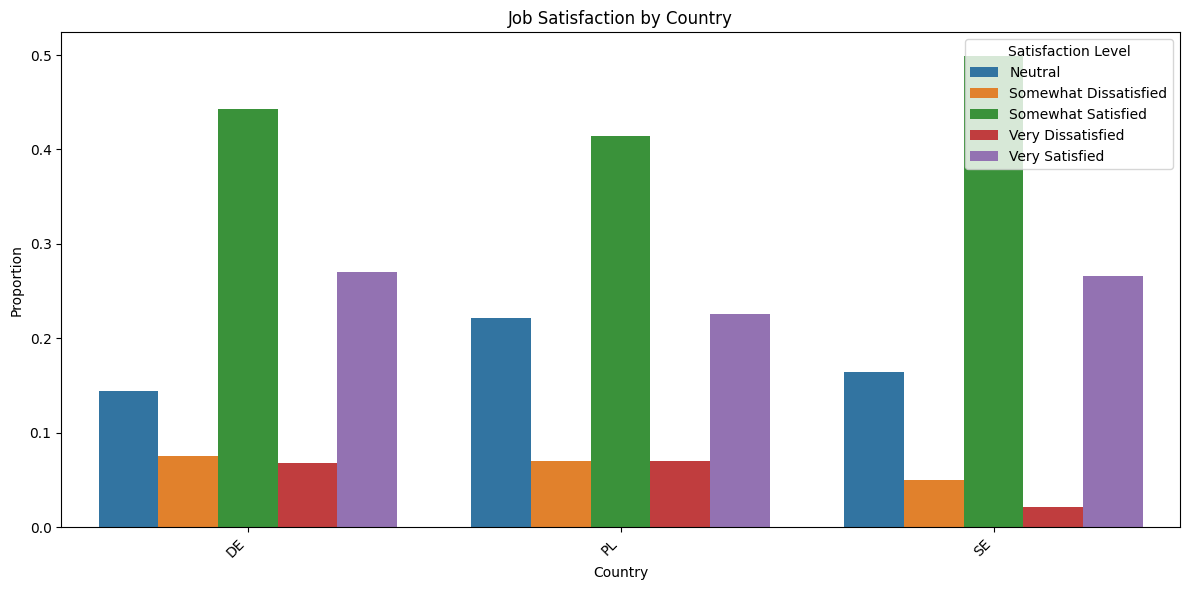

In [17]:
# --- Proportions by Country and Satisfaction Level ---
cntry_props = (
    clean_job_sat.groupby(['cntry', 'stfmjob_named'])
    .size()
    .reset_index(name='count')
)
cntry_props['proportion'] = (
    cntry_props.groupby('cntry')['count'].transform(lambda x: x / x.sum())
)

plt.figure(figsize=(12, 6))
sns.barplot(data=cntry_props, x='cntry', y='proportion', hue='stfmjob_named')
plt.title("Job Satisfaction by Country")
plt.xlabel("Country")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Satisfaction Level")
plt.tight_layout()
plt.show()


- A bar plot illustrates job satisfaction levels across countries.
- **Germany** (DE) has the **highest share of "Very Satisfied"** respondents.
- **Poland** (PL) shows a relatively higher proportion of respondents with **neutral job satisfaction** compared to other countries.

## 11. Job Satisfaction by Education Level

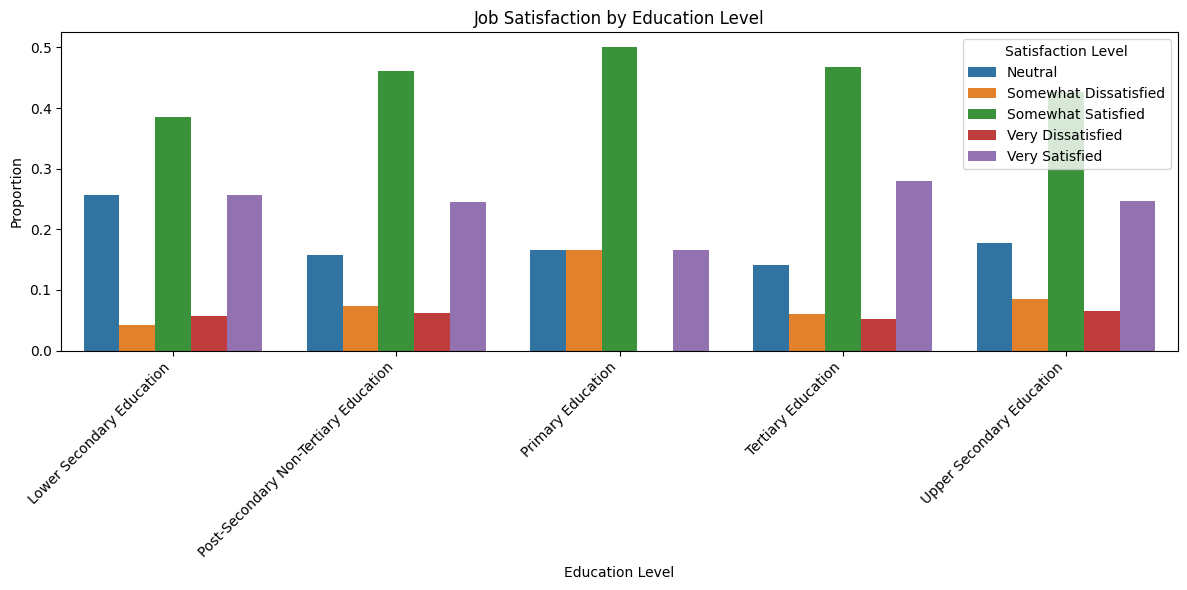

In [18]:
# --- Proportions by Education Level and Satisfaction Level ---
edu_props = (
    clean_job_sat.groupby(['edulvlb', 'stfmjob_named'])
    .size()
    .reset_index(name='count')
)
edu_props['proportion'] = (
    edu_props.groupby('edulvlb')['count'].transform(lambda x: x / x.sum())
)

plt.figure(figsize=(12, 6))
sns.barplot(data=edu_props, x='edulvlb', y='proportion', hue='stfmjob_named')
plt.title("Job Satisfaction by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Satisfaction Level")
plt.tight_layout()
plt.show()


- The bar chart presents the relationship between education level and job satisfaction.
- **Higher education levels** (e.g., Tertiary Education) are associated with **higher** proportions of **"Very Satisfied"** respondents.
- Respondents with **Primary Education** exhibit **lower** levels of **job satisfaction**.

## 11. Job Satisfaction by Job Category (Ordinal Grouped)

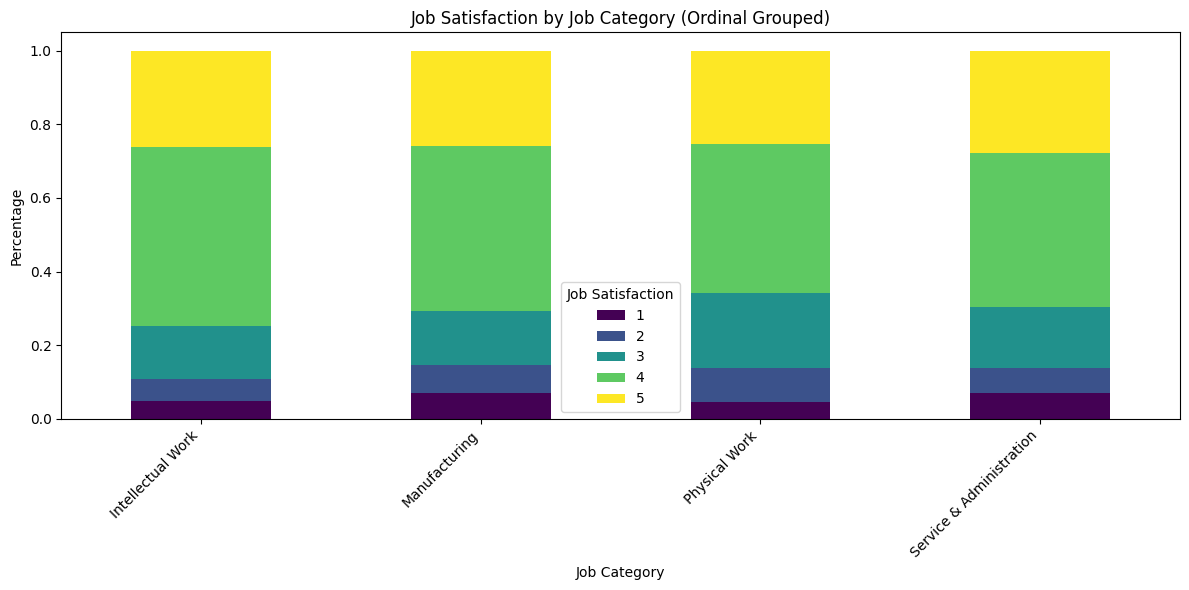

In [19]:
# --- Stacked Bar Chart: Job Satisfaction by Job Category (Raw stfmjob) ---
cross_tab_nacer = pd.crosstab(clean_job_sat['nacer2'], clean_job_sat['stfmjob_grouped'], normalize='index')

cross_tab_nacer.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Job Satisfaction by Job Category (Ordinal Grouped)")
plt.xlabel("Job Category")
plt.ylabel("Percentage")
plt.legend(title="Job Satisfaction")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- A stacked bar chart groups job satisfaction into five ordinal levels (from 1 = Very Dissatisfied to 5 = Very Satisfied) by job category.
- The distribution shows a **consistent trend** across sectors, with **most** respondents rating their **satisfaction as 4 or 5**.